## ARIMA 모델을 이용한 유튜버 성장률 예측

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 유튜버 정보 csv에서 읽어오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/공돌이 용달_stat.csv',index_col = 'searchDate')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
searchDate,,,,,
2019-11-14,138527,463000,96,96,93
2019-11-15,447397,464000,96,96,93
2019-11-16,474562,464000,96,96,93
2019-11-17,223403,465000,96,96,93
2019-11-18,298252,466000,96,96,93
...,...,...,...,...,...
2021-02-17,204368,574000,179,97,56
2021-02-18,188379,575000,179,97,56
2021-02-19,208658,575000,180,97,56


## 컬럼 정리 (구독자 수만 남겨놓기)

In [ ]:
del df['dailyViewCount']
del df['videoCount']
del df['favorablePercent']
del df['activePercent']

In [ ]:
df

,subscriberCount
searchDate,
2019-11-14,463000
2019-11-15,464000
2019-11-16,464000
2019-11-17,465000
2019-11-18,466000
...,...
2021-02-17,574000
2021-02-18,575000
2021-02-19,575000


## 30일 예측하기 위해서 마지막 한달 데이터 test로 분리

In [ ]:
df_size = len(df)
pred_date = 30 # 30일 예측
target_date = df_size - pred_date

In [ ]:
train_df = df[:target_date]

In [ ]:
test_df = df[target_date:]

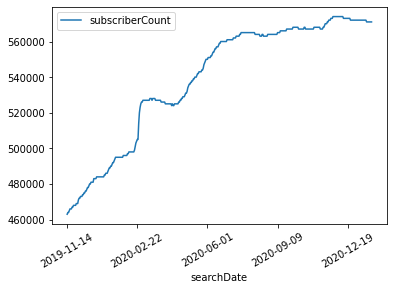

In [ ]:
train_df.plot()
plt.xticks(rotation=30)
plt.show()

## ARIMA 모델 설계 및 학습

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  434
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3435.506
Method:                       css-mle   S.D. of innovations            662.916
Date:                Sun, 21 Feb 2021   AIC                           6883.013
Time:                        06:57:33   BIC                           6907.451
Sample:                             1   HQIC                          6892.659
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        250.1498     79.748      3.137      0.002      93.847     406.453
ar.L1.D.y     -0.0823      0.204     -0.403      0.687      -0.483       0.318
ar.L2.D.y      0.7510      0.176      4.266      0.0

## 최종 30일 예측값 시각화

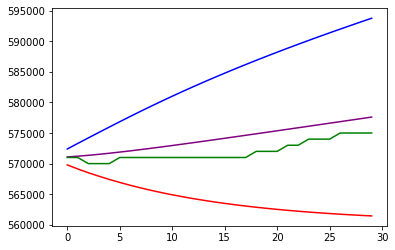

In [ ]:
# 학습 데이터셋으로부터 30일 뒤를 예측합니다.
forecast_data = model_fit.forecast(steps=30) 

pred_y = forecast_data[0].tolist() # 마지막 30일의 예측 데이터
test_y = test_df.subscriberCount.values # 실제 30일 가격 데이터
pred_y_lower = [] # 마지막 30일의 예측 데이터의 최소값
pred_y_upper = [] # 마지막 30일의 예측 데이터의 최대값
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

#plt.ylim([78000,88000])
plt.plot(pred_y, color="purple") # 모델이 예상한 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소 그래프
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

In [ ]:
from sklearn import metrics

print(metrics.mean_absolute_error(test_y, pred_y))

2148.179053709237


In [ ]:
forecast_data[0]

array([571089.73569334, 571213.51761558, 571353.60434666, 571517.91646142,
       571692.4787064 , 571884.38962604, 572082.56990499, 572293.2623743 ,
       572507.63291639, 572731.09692345, 572956.57446336, 573188.71514311,
       573421.81940646, 573659.84814735, 573898.19512201, 574140.21402122,
       574382.1696285 , 574626.88794139, 574871.33129647, 575117.8719879 ,
       575364.03354098, 575611.80133605, 575859.15218376, 576107.74359009,
       576355.91975904, 576605.06172957, 576853.81236501, 577103.32050083,
       577352.47239888, 577602.2224807 ])

## 발표날까지 예측

In [ ]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습
model = ARIMA(df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  464
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3664.751
Method:                       css-mle   S.D. of innovations            651.274
Date:                Sun, 21 Feb 2021   AIC                           7341.502
Time:                        06:57:34   BIC                           7366.342
Sample:                             1   HQIC                          7351.280
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.5180     75.659      3.219      0.001      95.230     391.806
ar.L1.D.y     -0.0792      0.198     -0.399      0.690      -0.468       0.310
ar.L2.D.y      0.7570      0.171      4.424      0.0

In [ ]:
# 2021/02/16 데이터셋으로부터 발표날까지 step일 이후까지 예측
step = 9
forecast_data = model_fit.forecast(steps=step) 

In [ ]:
# 기존 데이터 마지막 날의 다음 날을 구함(= 미래 예측 데이터의 시작 날짜)
next = str(pd.date_range(df.index[-1], periods=2)[1])[:10]

In [ ]:
# 예측 데이터 날짜 리스트 생성
forecast_date = []
for i in range(step):
  forecast_date.append(str(pd.date_range(next, periods=step)[i])[:10])

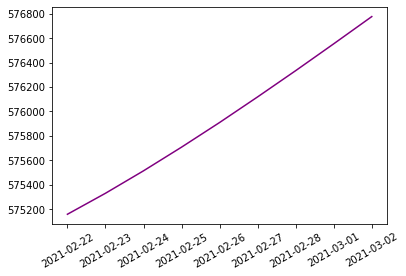

In [ ]:
pred_y = forecast_data[0].astype(int).tolist() #예측 데이터

plt.xticks(list(range(step)), forecast_date, rotation = 30)
plt.xticks(rotation=30)
plt.plot(pred_y, color="purple") # 모델이 예상한 구독자 수 그래프

In [ ]:
# 실제 예측 데이터 값
forecast_data[0].astype(int)

array([575157, 575329, 575513, 575707, 575909, 576119, 576334, 576554,
       576777])

In [ ]:
# 기존(과거) 데이터와 예측(미래) 데이터를 한 배열로 합침
arr = np.append(df['subscriberCount'].to_numpy(), pred_y)

In [ ]:
# 날짜 데이터 배열 생성
date_arr = []
for i in range(len(arr)):
  # 날짜가 너무 많으면 보기 힘드므로 10일에 한번씩만 기록하고 나머지는 공백
  if i % 10 == 0:
    date_arr.append(str(pd.date_range(df.index[0], periods=len(arr))[i])[:10])
  else:
    date_arr.append("")

# 마지막 날짜로부터 예측일 범주까지는 비움(마지막날이랑 가까우면 그래프에서 겹쳐서 안보임)
for i in range(1,step):
  date_arr[len(date_arr)-i] = ""

# 전체 날짜 데이터 마지막 날을 예측 데이터 마지막 날로 대체
date_arr[len(date_arr)-1] = forecast_date[-1]

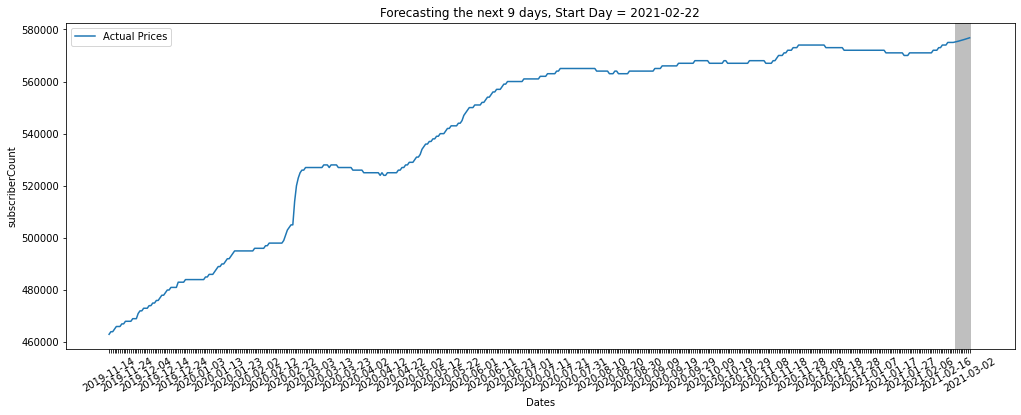

In [ ]:
plt.figure(figsize=(17,6))
# 기존(과거) 데이터
plt.plot(arr, label="Actual Prices")
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(pred_y)} days, Start Day = {forecast_date[0]}")
# 미래 예측 구간 강조
plt.axvspan(len(df), len(arr), facecolor='gray', alpha=0.5)
# x 축 값 이름 변경 / 회전
plt.xticks(list(range(len(arr))), date_arr, rotation = 30)
plt.legend()
plt.show()

In [ ]:
import datetime
from pytz import timezone, utc

KST = timezone('Asia/Seoul')
now = datetime.datetime.utcnow()
print(utc.localize(now).astimezone(KST))

2021-02-21 15:57:36.575449+09:00
